## MLP/ Feed Forward Activation

A 3 level neural network 

<img src="neural_net.gif"
     alt="Perceptron"
     style="width: 450px;" />

# Part -I Neural Architecture


<div style="background:black;color:white;">

#### **1 Layer Network** 

<img src="perceptron.jpeg"
     alt="Perceptron"
     style="width: 300px;" />
- Simplest unit Perceptron
- Only one output unit
- No hidden units
- Input is not counted in layers



#### **2 Layer Network** 
<img src="one_white.png"
     alt="Perceptron"
     style="width: 450px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net


#### **3 Layer Network** 
<img src="two_white.png"
     alt="Perceptron"
     style="width: 550px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

 </div>

In [245]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation 3 Layer Architecture

In [246]:
## Model Parameters

input_size=2 #no of features
layers=[4,3] # no of neurons in hidden layer 1 and hidden layer 2
output_size=2

In [247]:
def softmax(a):
    e_pa=np.exp(a) #Vector
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

def predict(a_):
    li=[]
    for i in range(a_.shape[0]):
        r=a_[i]
        c=np.argmax(r)
        li.append(c)
    return li

In [248]:
a=np.array([[3,4,10],[3,8,10]])
ans=np.sum(a,axis=1,keepdims=True)
ans,np.exp(a),np.exp(a)/ans

(array([[17],
        [21]]),
 array([[2.00855369e+01, 5.45981500e+01, 2.20264658e+04],
        [2.00855369e+01, 2.98095799e+03, 2.20264658e+04]]),
 array([[1.18150217e+00, 3.21165588e+00, 1.29567446e+03],
        [9.56454139e-01, 1.41950380e+02, 1.04887932e+03]]))

In [249]:
a=np.array([[3,110],[93,10]])
a_=softmax(a)
a_

array([[3.39227019e-47, 1.00000000e+00],
       [1.00000000e+00, 8.98582594e-37]])

In [250]:
predict(a_)

[1, 0]

In [269]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        
        # 1st Hidden Layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        # 2nd Hidden Layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        # Output Layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        self.activation_model=None
    
    ## Understanding Forward Propagation
    #How to pass one or multiple examples in forward direction?
    def forward(self,x):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1) #same as signmoid function, transfer the funct into [-1,1]
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        out=softmax(z3) 
        
        self.activation_model=(a1,a2,out)
        
        return out
    
    
    
    '''Here the forward propagation will gives the result if we use 
       predict function but that will be random as we have randomly assigned
       values to W1,W2,W3,b1,b2,b3. That's why going for backward propagation
    '''
    
    
    ## Backward Propagation
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,out=self.activation_model
        
        m=x.shape[0]
        
        delta3=out-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        
        ## Update the model parameters using Gradient Descent
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        
    def predict(self,x):
        yout=self.forward(x)
        return np.argmax(yout,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,out=self.activation_model
        
        print("W1 Shape",W1.shape)
        print("a1 Shape",a1.shape)
        
        print("W2 Shape",W2.shape)
        print("a2 Shape",a2.shape)
        
        print("W3 Shape",W3.shape)
        print("out Shape",out.shape)
        

In [308]:
def losses(y_oht,p): #one hot vector
    l=-np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

## Generate Datasets

In [253]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [254]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
X.shape,Y.shape

((500, 2), (500,))

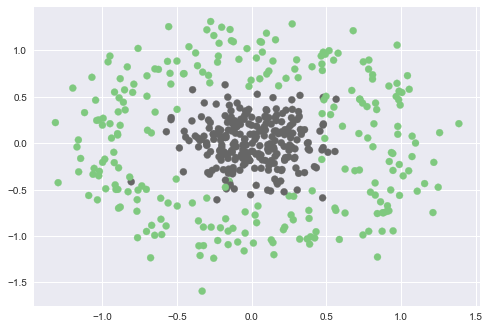

In [255]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training

In [227]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [228]:
ypred=model.forward(X)
ypred.shape

(500, 2)

In [229]:
Y

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [230]:
y_oht=one_hot(Y,2)
y_oht

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [231]:
model.summary()

W1 Shape (2, 10)
a1 Shape (500, 10)
W2 Shape (10, 5)
a2 Shape (500, 5)
W3 Shape (5, 2)
out Shape (500, 2)


In [318]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(X)
        #ls=losses(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        
        if logs:
            print("Epoch %d Loss is %.4f"%(ix,ls))
        
        #training_loss.append(ls)
    #return training_loss

In [233]:
losses=train(X,Y,model,epochs=500,learning_rate=0.001,logs=True)

Epoch 0 Loss is 0.3571
Epoch 1 Loss is 0.3554
Epoch 2 Loss is 0.2593
Epoch 3 Loss is 0.2407
Epoch 4 Loss is 0.2258
Epoch 5 Loss is 0.2132
Epoch 6 Loss is 0.2020
Epoch 7 Loss is 0.1919
Epoch 8 Loss is 0.1827
Epoch 9 Loss is 0.1742
Epoch 10 Loss is 0.1664
Epoch 11 Loss is 0.1593
Epoch 12 Loss is 0.1527
Epoch 13 Loss is 0.1467
Epoch 14 Loss is 0.1411
Epoch 15 Loss is 0.1360
Epoch 16 Loss is 0.1313
Epoch 17 Loss is 0.1270
Epoch 18 Loss is 0.1230
Epoch 19 Loss is 0.1193
Epoch 20 Loss is 0.1159
Epoch 21 Loss is 0.1127
Epoch 22 Loss is 0.1098
Epoch 23 Loss is 0.1070
Epoch 24 Loss is 0.1045
Epoch 25 Loss is 0.1021
Epoch 26 Loss is 0.0999
Epoch 27 Loss is 0.0978
Epoch 28 Loss is 0.0958
Epoch 29 Loss is 0.0940
Epoch 30 Loss is 0.0922
Epoch 31 Loss is 0.0906
Epoch 32 Loss is 0.0891
Epoch 33 Loss is 0.0876
Epoch 34 Loss is 0.0862
Epoch 35 Loss is 0.0849
Epoch 36 Loss is 0.0837
Epoch 37 Loss is 0.0825
Epoch 38 Loss is 0.0814
Epoch 39 Loss is 0.0803
Epoch 40 Loss is 0.0793
Epoch 41 Loss is 0.0783
Ep

Epoch 416 Loss is 0.0403
Epoch 417 Loss is 0.0403
Epoch 418 Loss is 0.0403
Epoch 419 Loss is 0.0403
Epoch 420 Loss is 0.0403
Epoch 421 Loss is 0.0403
Epoch 422 Loss is 0.0403
Epoch 423 Loss is 0.0403
Epoch 424 Loss is 0.0402
Epoch 425 Loss is 0.0402
Epoch 426 Loss is 0.0402
Epoch 427 Loss is 0.0402
Epoch 428 Loss is 0.0402
Epoch 429 Loss is 0.0402
Epoch 430 Loss is 0.0402
Epoch 431 Loss is 0.0402
Epoch 432 Loss is 0.0401
Epoch 433 Loss is 0.0401
Epoch 434 Loss is 0.0401
Epoch 435 Loss is 0.0401
Epoch 436 Loss is 0.0401
Epoch 437 Loss is 0.0401
Epoch 438 Loss is 0.0401
Epoch 439 Loss is 0.0401
Epoch 440 Loss is 0.0400
Epoch 441 Loss is 0.0400
Epoch 442 Loss is 0.0400
Epoch 443 Loss is 0.0400
Epoch 444 Loss is 0.0400
Epoch 445 Loss is 0.0400
Epoch 446 Loss is 0.0400
Epoch 447 Loss is 0.0400
Epoch 448 Loss is 0.0399
Epoch 449 Loss is 0.0399
Epoch 450 Loss is 0.0399
Epoch 451 Loss is 0.0399
Epoch 452 Loss is 0.0399
Epoch 453 Loss is 0.0399
Epoch 454 Loss is 0.0399
Epoch 455 Loss is 0.0399


In [234]:
losses

[0.3570778358444834,
 0.3553901654344994,
 0.25929981288772785,
 0.2407145422493582,
 0.22578256002970135,
 0.2132015270110819,
 0.20202048362909888,
 0.1919060028361365,
 0.18266687177949364,
 0.17419320960390167,
 0.16641108491082002,
 0.159261378335489,
 0.15269226391596008,
 0.14665577858026574,
 0.14110684386598593,
 0.13600303045326262,
 0.1313046287789121,
 0.12697475206146283,
 0.12297939092594808,
 0.11928739615176076,
 0.11587039648964709,
 0.1127026674294055,
 0.10976096747872617,
 0.10702435607552933,
 0.10447400402037516,
 0.10209300436028074,
 0.09986618922395481,
 0.09777995622179946,
 0.09582210659639558,
 0.09398169625124572,
 0.09224890001841936,
 0.09061488898597289,
 0.08907172034235009,
 0.0876122389657878,
 0.0862299898581912,
 0.08491914046766484,
 0.08367441194020762,
 0.08249101837214917,
 0.08136461318796404,
 0.08029124183372124,
 0.07926730004786418,
 0.07828949704359255,
 0.0773548230077309,
 0.07646052038768031,
 0.0756040584997564,
 0.07478311104840743,
 

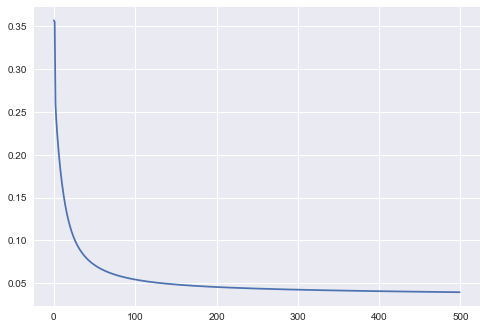

In [235]:
plt.plot(losses)
plt.show()

## Visualization

In [236]:
from visualize import plot_decision_boundary

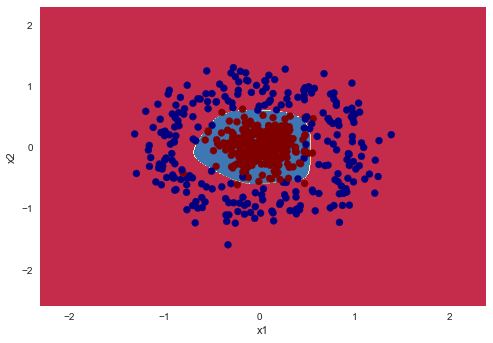

In [237]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [238]:
outputs=model.predict(X)
outputs

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [240]:
"training accuracy",np.sum(outputs==Y)/Y.shape[0]

('training accuracy', 0.97)

## Testing on other non linear Datasets

In [309]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

## XOR Dataset

In [310]:
'''
  0,0=>0
  0,1=>1
  1,0=>1
  1,1=>1

'''

X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,0])

In [311]:
losses=train(X,Y,model,epochs=200,learning_rate=0.045,logs=False)

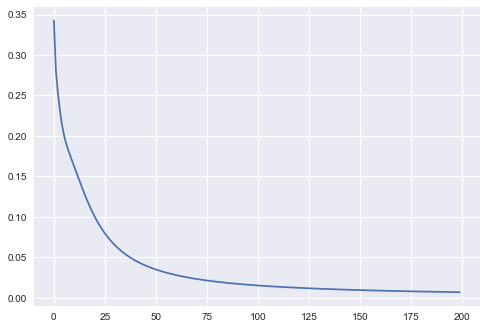

In [312]:
plt.plot(losses)
plt.show()

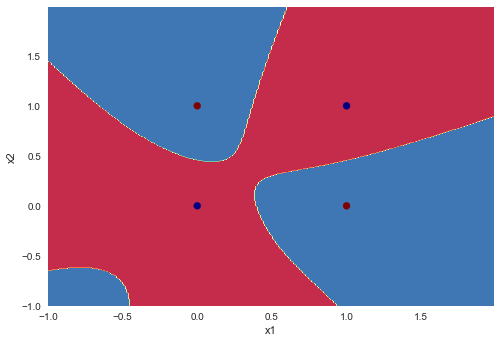

In [313]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [282]:
outputs=model.predict(X)
"training accuracy",np.sum(outputs==Y)/Y.shape[0]

('training accuracy', 1.0)

## Other Datasets

In [314]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [315]:
def load_dataset(dataset):
    
    if dataset=="moons":
        X,Y=make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=="circles":
        X,Y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset=="classification":
        X,Y=make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X=np.array([[0,0],[0,1],[1,0],[1,1]])
        Y=np.array([0,1,1,0])
    
    return X,Y

acc for xor is 1.0


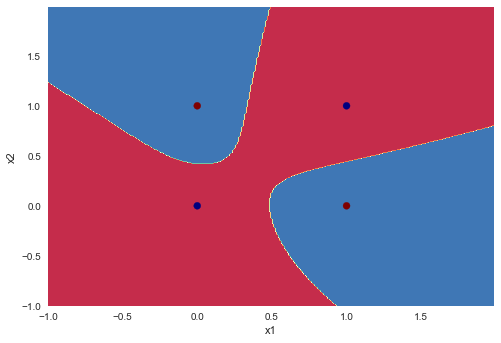

acc for moons is 0.974


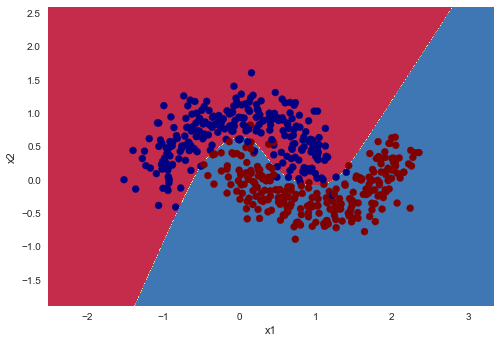

acc for classification is 0.96


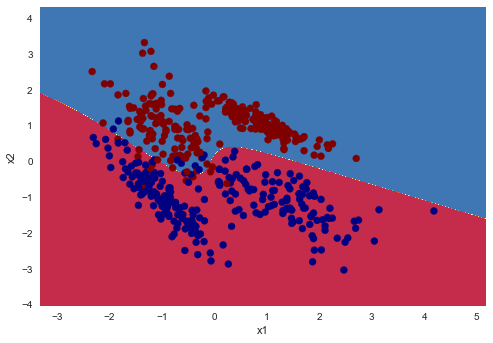

acc for circles is 0.964


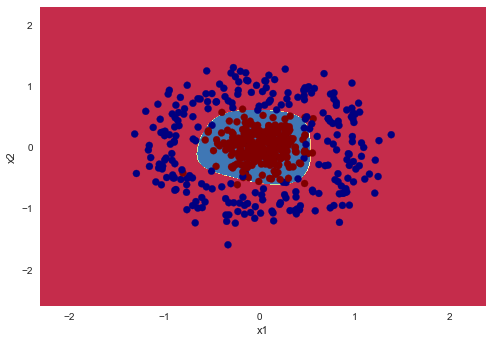

In [320]:
datasets=['xor','moons','classification','circles']

for dataset in datasets:
    X,Y=load_dataset(dataset)
    model=NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    train(X,Y,model,1000,0.001,logs=False)
    outputs=model.predict(X)
    acc=np.sum(outputs==Y)/Y.shape[0]
    print(f"acc for {dataset} is {acc}")
    
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()